# Visualización

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import json
import statistics 

In [2]:
mad = pd.read_csv('./data/mad_for_vis.csv', encoding = 'utf-8-sig')
mad.head()

,Unnamed: 0,id,host_id,host_name,room_type,disctricts,neighbourhoods,price,number_of_reviews,latitude,longitude,monument
0,0,6369,13660,Simon,Private room,Chamartín,Hispanoamérica,70,65,40.45628,-3.67763,Estadio Santiago Bernabéu
1,1,21853,83531,Abdel,Private room,Latina,Cármenes,17,33,40.40341,-3.74084,La Latina
2,2,24805,101471,Iraido,Entire home/apt,Centro,Universidad,80,2,40.42202,-3.70395,Gran Vía
3,3,24836,101653,Tenty,Entire home/apt,Centro,Justicia,115,64,40.41995,-3.69764,Edificio Metrópolis
4,4,26825,114340,Agustina,Private room,Arganzuela,Legazpi,25,136,40.38985,-3.69011,Paseo del Prado


In [3]:
mad.columns

Index(['Unnamed: 0', 'id', 'host_id', 'host_name', 'room_type', 'disctricts',
       'neighbourhoods', 'price', 'number_of_reviews', 'latitude', 'longitude',
       'monument'],
      dtype='object')

In [4]:
mad=mad.drop(columns=['Unnamed: 0'])
mad.head()

,id,host_id,host_name,room_type,disctricts,neighbourhoods,price,number_of_reviews,latitude,longitude,monument
0,6369,13660,Simon,Private room,Chamartín,Hispanoamérica,70,65,40.45628,-3.67763,Estadio Santiago Bernabéu
1,21853,83531,Abdel,Private room,Latina,Cármenes,17,33,40.40341,-3.74084,La Latina
2,24805,101471,Iraido,Entire home/apt,Centro,Universidad,80,2,40.42202,-3.70395,Gran Vía
3,24836,101653,Tenty,Entire home/apt,Centro,Justicia,115,64,40.41995,-3.69764,Edificio Metrópolis
4,26825,114340,Agustina,Private room,Arganzuela,Legazpi,25,136,40.38985,-3.69011,Paseo del Prado


In [5]:
mad.rename(columns={'monument':'attraction'},inplace=True)
mad.head()

,id,host_id,host_name,room_type,disctricts,neighbourhoods,price,number_of_reviews,latitude,longitude,attraction
0,6369,13660,Simon,Private room,Chamartín,Hispanoamérica,70,65,40.45628,-3.67763,Estadio Santiago Bernabéu
1,21853,83531,Abdel,Private room,Latina,Cármenes,17,33,40.40341,-3.74084,La Latina
2,24805,101471,Iraido,Entire home/apt,Centro,Universidad,80,2,40.42202,-3.70395,Gran Vía
3,24836,101653,Tenty,Entire home/apt,Centro,Justicia,115,64,40.41995,-3.69764,Edificio Metrópolis
4,26825,114340,Agustina,Private room,Arganzuela,Legazpi,25,136,40.38985,-3.69011,Paseo del Prado


In [6]:
mad.dtypes

id                     int64
host_id                int64
host_name             object
room_type             object
disctricts            object
neighbourhoods        object
price                  int64
number_of_reviews      int64
latitude             float64
longitude            float64
attraction            object
dtype: object

In [7]:
#Analizo los precios.
mad.price.unique()

array([  70,   17,   80,  115,   25,   65,   54,   90,   40,   45,   75,
        110,   85,   63,  102,   60,  100,   50,   32,   20,  194,   95,
         57,   35,   29,   67,  200,   26,   21,   69,  150,   19,   30,
         89,   77,  140,   55,  145,   98,   83,   74,   28,   66,  480,
         72,   59,  169,   58,   43,   68,  155,  116,   24,   82,   22,
         79,   81,  130,  135,   52,   49,  105,   88,   56,   48,   38,
        120,  112,  350,  190,   97,   84,   39,   34,  300,   23,   99,
         33,   78,  165,   37,  250,  197,   16,  125,  149,  210,  108,
         73,  205,   42,  104,   27,   61,  220,   87,  129,   12,   96,
         62,  107,   31,   64,  221,  132,   94,  185,  198,   44,   18,
         46,  101,  148,   76,  230,   15,  510,  118,   53,   91,   51,
       1000,   36,  153,   41,  270,  160,   13,  400,  121,  315,   71,
        139,   47,  204,  481,  199,  375,  137,  175,  109,  542,  106,
        260,  170,  159,  225,   92,  103,   86,   

In [10]:
#Creo una columna nueva con rango de precios.
mad['price_ranges'] = pd.cut(mad.price, bins=[0, 50, 100, 150, 200, 300, 500, 10000])
mad

,id,host_id,host_name,room_type,disctricts,neighbourhoods,price,number_of_reviews,latitude,longitude,attraction,price_ranges
0,6369,13660,Simon,Private room,Chamartín,Hispanoamérica,70,65,40.45628,-3.67763,Estadio Santiago Bernabéu,"(50, 100]"
1,21853,83531,Abdel,Private room,Latina,Cármenes,17,33,40.40341,-3.74084,La Latina,"(0, 50]"
2,24805,101471,Iraido,Entire home/apt,Centro,Universidad,80,2,40.42202,-3.70395,Gran Vía,"(50, 100]"
3,24836,101653,Tenty,Entire home/apt,Centro,Justicia,115,64,40.41995,-3.69764,Edificio Metrópolis,"(100, 150]"
4,26825,114340,Agustina,Private room,Arganzuela,Legazpi,25,136,40.38985,-3.69011,Paseo del Prado,"(0, 50]"
...,...,...,...,...,...,...,...,...,...,...,...,...
20832,38725567,226958922,CristÃ³bal,Entire home/apt,Chamartín,Castilla,100,0,40.47847,-3.68395,Estadio Santiago Bernabéu,"(50, 100]"
20833,38726351,178608863,Rostyslav,Private room,Puente de Vallecas,Palomeras Sureste,24,0,40.38533,-3.63968,Palacio De Cristal,"(0, 50]"
20834,38727654,182062359,Jose Maciel,Entire home/apt,Centro,Universidad,75,0,40.42182,-3.70336,Gran Vía,"(50, 100]"
20835,38728727,31425029,Valeska,Entire home/apt,Centro,Embajadores,45,0,40.40896,-3.70107,Barrio de Las Letras,"(0, 50]"


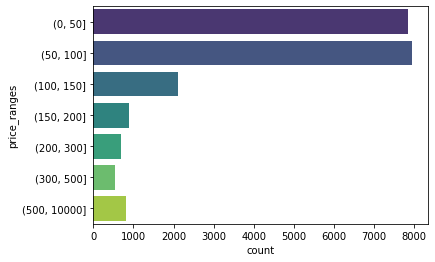

In [30]:
#Los precios de los apartamentos se encuentran la mayoría entre 0 y 100 euros.
priceranges = sns.countplot(y=mad.price_ranges, palette="viridis")
priceranges.figure.savefig('output/precios.png')

In [12]:
#La media son 134 euros.
media = round(mad['price'].mean())
media

134

In [13]:
mediana = round(mad['price'].median())
mediana

65

<AxesSubplot:xlabel='price'>

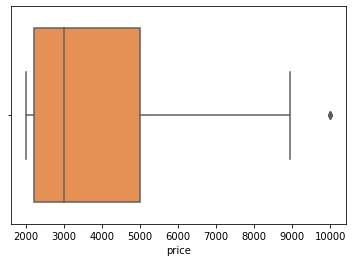

In [14]:
#Entre los 100 apartamentos más caros el 50% se encuentra en 3000 euros.
mediag = sns.boxplot(x=mad["price"].nlargest(100), data=mad, palette ="Oranges")
mediag

In [15]:
#Más datos.
mad["price"].nlargest(100).describe()

count     100.000000
mean     4230.220000
std      2529.146395
min      1999.000000
25%      2200.000000
50%      3000.000000
75%      5000.000000
max      9999.000000
Name: price, dtype: float64

<AxesSubplot:xlabel='price'>

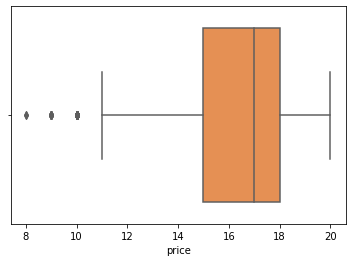

In [16]:
#Entre los 1000 apartamentos más baratos el 50% se encuentra en 17 euros.
mediah = sns.boxplot(x=mad["price"].nsmallest(1000), data=mad, palette ="Oranges")
mediah

In [17]:
#Más datos.
mad["price"].nsmallest(1000).describe()

count    1000.00000
mean       16.35800
std         2.62883
min         8.00000
25%        15.00000
50%        17.00000
75%        18.00000
max        20.00000
Name: price, dtype: float64

In [18]:
#el apartamento más caro.
exp = round(mad['price'].max())
exp

9999

In [19]:
#Los 4 apartamentos más caros se encuentran en el distrito Centro y el barrio Justicia. 
mad.loc[mad["price"]== 9999]

,id,host_id,host_name,room_type,disctricts,neighbourhoods,price,number_of_reviews,latitude,longitude,attraction,price_ranges
11799,27417973,189959417,Adrian,Private room,Centro,Justicia,9999,1,40.42661,-3.70051,Malasaña,"(500, 10000]"
11801,27418553,189959417,Adrian,Private room,Centro,Justicia,9999,0,40.42521,-3.70041,Malasaña,"(500, 10000]"
11804,27418907,189959417,Adrian,Private room,Centro,Justicia,9999,1,40.42449,-3.69903,Malasaña,"(500, 10000]"
16853,34851930,106745942,Alaia,Entire home/apt,Centro,Justicia,9999,2,40.42555,-3.70020,Malasaña,"(500, 10000]"


In [20]:
#el apartamento más barato.
bar = round(mad['price'].min())
bar

8

In [21]:
#Los dos apartamentos más baratos se encuentran en Ciudad Lineal y Arganzuela.
mad.loc[mad["price"]== 8]

,id,host_id,host_name,room_type,disctricts,neighbourhoods,price,number_of_reviews,latitude,longitude,attraction,price_ranges
6344,18351752,69998776,JosÃ©,Private room,Ciudad Lineal,Pueblo Nuevo,8,2,40.42576,-3.63870,Calle de Alcalá,"(0, 50]"
7757,20049665,68664241,Luis Carlos,Private room,Arganzuela,Chopera,8,0,40.39622,-3.69926,Puente de Toledo,"(0, 50]"


In [22]:
#Existen 21 distritos en Madrid.
mad['disctricts'].value_counts()

Centro                   9773
Salamanca                1375
Chamberí                 1331
Arganzuela               1121
Tetuán                    838
Carabanchel               678
Retiro                    665
Latina                    616
Ciudad Lineal             613
Puente de Vallecas        591
Chamartín                 551
Moncloa - Aravaca         542
San Blas - Canillejas     524
Usera                     361
Hortaleza                 332
Fuencarral - El Pardo     300
Villaverde                166
Barajas                   165
Moratalaz                 127
Villa de Vallecas         103
Vicálvaro                  65
Name: disctricts, dtype: int64

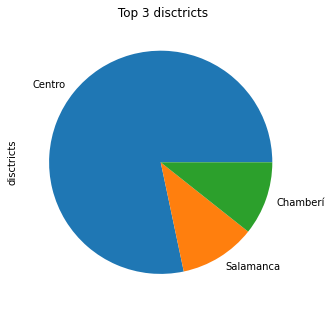

In [31]:
#Los distritos donde más apartamentos existen: Centro, Salamanca y Chamberí.
top3d = mad["disctricts"].value_counts().nlargest(3).plot.pie(figsize = (5,10), title = " Top 3 disctricts")
top3d.figure.savefig('output/top3d.png')

<AxesSubplot:>

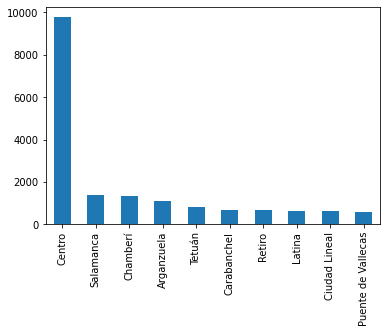

In [24]:
mad["disctricts"].value_counts().nlargest(10).plot.bar()

In [25]:
mad['attraction'].value_counts()

Malasaña                               2288
Barrio de Las Letras                   2086
Estadio Santiago Bernabéu              2076
Paseo del Prado                        1688
Plaza Mayor                            1642
Barrio de Salamanca                    1391
Puente de Toledo                       1276
Gran Vía                               1238
Calle de Alcalá                        1225
Palacio De Cristal                     1001
Edificio Metrópolis                     865
La Latina                               803
Fundación Mapfre Recoletos              642
Cripta de la Almudena                   591
Casa de la Panaderia                    478
Museo Cerralbo                          374
Templo de Debod                         260
Monumento a Alfonso XII                 237
Plaza de Oriente                        170
Puerta de Alcalá                        137
Ermita De San António De La Florida      96
Museo de la Catedral de la Almudena      93
Palacio Real de Madrid          

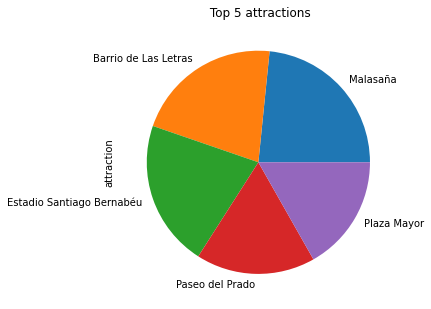

In [32]:
#Las 5 attaciones más populares donde más apartamentos hay:
top5 = mad["attraction"].value_counts().nlargest(5).plot.pie(figsize = (5,10), title = " Top 5 attractions")
top5.figure.savefig('output/top5.png')

<AxesSubplot:xlabel='count', ylabel='attraction'>

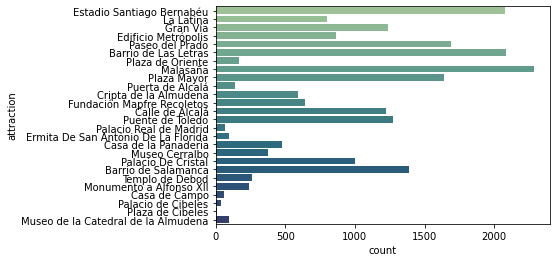

In [27]:
sns.countplot(y= mad.attraction, palette="crest")

<AxesSubplot:xlabel='count', ylabel='attraction'>

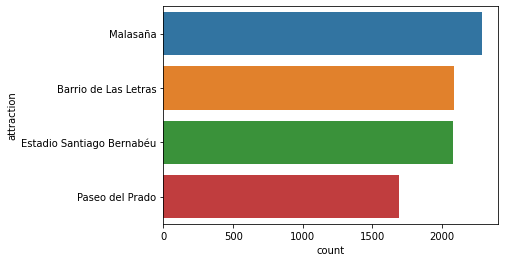

In [28]:
sns.countplot(y= mad['attraction'], order = ['Malasaña','Barrio de Las Letras','Estadio Santiago Bernabéu', 'Paseo del Prado'])